# Polynomial Regression

## Importing the libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from astropy.io import ascii

## Importing the dataset

In [23]:
from Preprocessor4 import get_combined_dataset
from Preprocessor4 import get_single_dataset
training_set = get_combined_dataset("training_data/Typ2_intrapoliert/training", 4, 12)
X_train = training_set.iloc[:, 2:].values
y_train = training_set.iloc[:, 1].values
test_set = get_combined_dataset("training_data/Typ1_intrapoliert/test", 1, 3)
X_test = test_set.iloc[:, 2:].values
y_test = test_set.iloc[:, 1].values

## Training the Polynomial Regression model on the Training set

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

## Predicting the Test set results

In [25]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[18.47 19.77]
 [18.47 19.77]
 [18.47 19.77]
 ...
 [18.54 18.77]
 [18.54 18.85]
 [18.54 18.92]]


## Plot the Model Performance

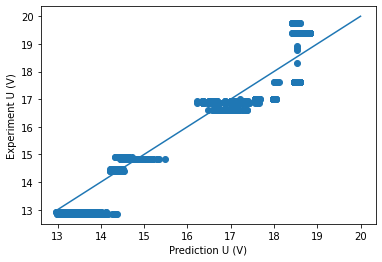

In [26]:
plt.scatter(y_pred, y_test)
plt.xlabel("Prediction U (V)")
plt.ylabel("Experiment U (V)")
plt.plot([13, 20], [13, 20])
plt.show()

In [27]:
## Calculate Model Performance

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8979490986081335

In [29]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

0.6255031954718888


In [30]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

51.41233402293369


In [31]:
ascii.write([y_test, y_pred], 'poly_u_train2test1_originalH2.dat', names=['y_test', 'y_pred'], overwrite=True)